# Une astuce simple pour tirer le meilleur parti des tableaux croisés dynamiques dans Pandas

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Créer des données

In [2]:
city_list = ["New York", "Munich", "Bombay", 
             "Sydney", "Londres", "Moscou", "Dubai", "Tokyo"]

job_list = ["Ingénieur en développement logicies", "Ingénieur de recherche", 
            "Ingénieur de Test", "Ingénieur en développement de logiciels-II", 
            "Développeur Python", "Développeur Back-End", 
            "Développeur Front-End", "Data Scientist", 
            "Développeur IOS", "Développeur Android"]

cmp_list = ["Amazon", "Google", "Microsoft", 
            "Uber", "IBM", "Apple"]

data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Temps plein", "Stagiaire"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])
    
data = pd.DataFrame(data, columns=["Nom entreprise", "Titre du poste du salarié",
                                   "Lieu de travail du salarié",  "Salaire du salarié", 
                                   "Situation professionnelle", "Évaluation du salarié"])

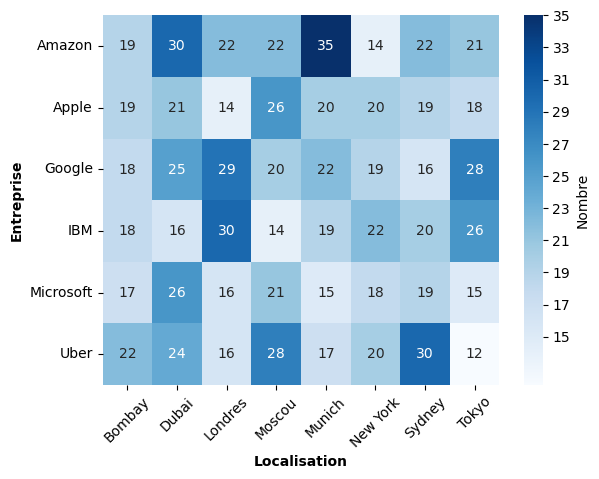

In [3]:
result_pivot = pd.pivot_table(data, index = "Nom entreprise", columns = "Lieu de travail du salarié", values = "Évaluation du salarié", aggfunc="count" )
ticks=np.arange(15, 36, 2)
plot_ = sns.heatmap(result_pivot, annot=True, cmap = "Blues", fmt='d', cbar_kws={"ticks":ticks})
plot_.collections[0].colorbar.set_label("Nombre")
fig = plot_.get_figure()
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel("Localisation", weight='bold')
plt.ylabel("Entreprise", weight='bold');

In [4]:
pd.pivot_table(data, index = "Nom entreprise", columns = "Lieu de travail du salarié", values = "Évaluation du salarié", aggfunc="count" )

Lieu de travail du salarié,Bombay,Dubai,Londres,Moscou,Munich,New York,Sydney,Tokyo
Nom entreprise,,,,,,,,
Amazon,19,30,22,22,35,14,22,21
Apple,19,21,14,26,20,20,19,18
Google,18,25,29,20,22,19,16,28
IBM,18,16,30,14,19,22,20,26
Microsoft,17,26,16,21,15,18,19,15
Uber,22,24,16,28,17,20,30,12
